maximum degree: $\Delta = \max \deg(v)$

chromatic number: $\mathcal{X}(G) \leqslant \Delta + 1$ (оценка жадного алгоритма)

двудольные графы $B(m,n)$: $\mathcal{X}=2$

полные графы $K_n$: $\Delta=n-1$, $\mathcal{X}=n$

циклы чётной длины $C_{2n}$: $\Delta=2$, $\mathcal{X}=2$

циклы нечётной длины $C_{2n+1}$: $\Delta=2$, $\mathcal{X}=3$

Теорема Брукса: $\mathcal{X}(G) \leqslant \Delta$ для всех графов кроме полных и нечётных циклов

In [1]:
from itertools import permutations

def greedy_for_bipartite(wanted_num, max_results=float('inf')):
    G = {1:[6,7,8], 2: [5,7,8], 3: [5,6,8], 4:[5,6,7],
         5:[2,3,4], 6:[1,3,4], 7:[1,2,4], 8:[1,2,3]}
    COLORS = set(G.keys()) 
    def color_it(order):
        def get_neighb_colors(v, dict_colors):
            return {dict_colors[n] for n in G[v] if dict_colors[n]!=None}
        cur_colors = dict.fromkeys(G.keys(), None)
        for v in order:
            cur_colors[v] = min(COLORS - get_neighb_colors(v, cur_colors))
        return set(cur_colors.values())
    count = 0
    for order in permutations(G.keys()):
        if len(color_it(order)) == wanted_num:
            print(order)
            count += 1
            if count >= max_results:
                break

In [2]:
greedy_for_bipartite(wanted_num=2, max_results=1)

(1, 2, 3, 4, 5, 6, 7, 8)


![](images/greedy-bipartite-4-4-best.png)

In [3]:
greedy_for_bipartite(wanted_num=4, max_results=1)

(1, 5, 2, 6, 3, 4, 7, 8)


![](images/greedy-bipartite-4-4-worst.png)

In [4]:
from itertools import permutations

def find_bad_for_greedy():
    def color_it(G, order):
        COLORS = set(G.keys())
        def get_neighb_colors(v, dict_colors):
            return {dict_colors[n] for n in G[v] if dict_colors[n]!=None}
        cur_colors = dict.fromkeys(G.keys(), None)
        for v in order:
            cur_colors[v] = min(COLORS - get_neighb_colors(v, cur_colors))
        return set(cur_colors.values())

    def num_colors(G, order):
        return len(color_it(G, order))

    G = {1:[6,7,8], 2:[5,7,8], 3:[5,6],   4:[5,6,7],
         5:[2,3,4], 6:[1,3,4], 7:[1,2,4], 8:[1,2]}
    for order in permutations(G.keys()):
        if num_colors(G, order) == 4 and 8 == order[-1]:
            break
    else:
        return 'failed'

    print('original graph:', G)
    print('this order makes greedy alorithm suck:', order)
    order = sorted(order, key=lambda n: len(G[n]), reverse=True)
    print('additionally sort by reverse degree:', order)
    print('degrees along new order are:', [len(G[n]) for n in order])

    remap = {order[i]: i+1 for i in range(len(order))}
    print('new mapping:', remap)
    G = {remap[k]: [remap[b] for b in adj] for k, adj in G.items()}
    print('new graph:', G)

    order = sorted(G.keys())
    print('order now is simple:', order)
    print('degrees along it are:', [len(G[n]) for n in order])
    print('greedy alorithm hits this many colors:', num_colors(G, order))

    edges = sorted(set((a,b) for a in G.keys() for b in G[a]))
    halves = sorted(set((min(a,b),max(a,b)) for a,b in edges))
    print('edges:', ' '.join('%s %s' % e for e in halves))
    return halves

edges = find_bad_for_greedy()

original graph: {1: [6, 7, 8], 2: [5, 7, 8], 3: [5, 6], 4: [5, 6, 7], 5: [2, 3, 4], 6: [1, 3, 4], 7: [1, 2, 4], 8: [1, 2]}
this order makes greedy alorithm suck: (1, 5, 2, 6, 3, 4, 7, 8)
additionally sort by reverse degree: [1, 5, 2, 6, 4, 7, 3, 8]
degrees along new order are: [3, 3, 3, 3, 3, 3, 2, 2]
new mapping: {1: 1, 5: 2, 2: 3, 6: 4, 4: 5, 7: 6, 3: 7, 8: 8}
new graph: {1: [4, 6, 8], 3: [2, 6, 8], 7: [2, 4], 5: [2, 4, 6], 2: [3, 7, 5], 4: [1, 7, 5], 6: [1, 3, 5], 8: [1, 3]}
order now is simple: [1, 2, 3, 4, 5, 6, 7, 8]
degrees along it are: [3, 3, 3, 3, 3, 3, 2, 2]
greedy alorithm hits this many colors: 4
edges: 1 4 1 6 1 8 2 3 2 5 2 7 3 6 3 8 4 5 4 7 5 6


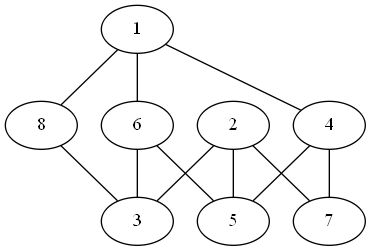

In [5]:
%matplotlib inline
import networkx as nx
from IPython.display import Image
G = nx.from_edgelist(edges)
dot = nx.drawing.nx_pydot.to_pydot(G)
Image(dot.create_png(prog='dot'))

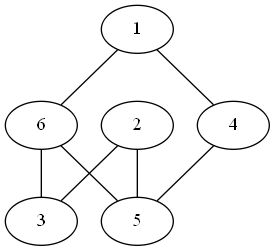

In [6]:
%matplotlib inline
import networkx as nx
from IPython.display import Image
G.remove_nodes_from([7,8])
dot = nx.drawing.nx_pydot.to_pydot(G)
Image(dot.create_png(prog='dot'))